In [1]:
'''Make figures of reconstruction quality.'''


import os
import yaml

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# Functions #####################################################

def weird_form_to_long(df, target_col, identify_cols=[]):
    df_result = pd.DataFrame()
    for i, row in df.iterrows():
        tmp = {}
        for col in identify_cols:
            tmp[col] = row[col]
        tmp[target_col] = row[target_col]
        df_result = pd.concat([df_result, pd.DataFrame(tmp)])
    return df_result

In [3]:
# Settings #######################################################
conf_file = "config/recon_vggsound_fmriprep_rep4_500voxel_vggishish_allunits_fastl2lir_alpha100.yaml"
output_dir = '../data/figures'

with open(conf_file, 'r') as f:
    conf = yaml.safe_load(f)
quality_file = os.path.join(conf['eval feat output dir'], "quality.pkl.gz")
audiofeature_quality_file = os.path.join(conf['eval feat output dir'], "quality_audiofeature.pkl.gz")
eval_feats = ["mel", "conv1", "conv5", "mix5_d", "mix6_e", "mix7_c", "fc1", "f0", "sc", "hnr"]

subjects = conf['recon subjects']
rois = conf['recon rois']
layers = list(conf['recon layers'].keys())

#print("Qaultiy filepath:", quality_file)
print("Audio feature qaultiy filepath:", audiofeature_quality_file)
print("Subjects:   {}".format(subjects))
print("ROIs:       {}".format(rois))
print("Layers:     {}".format(layers))
print("Eval feats: {}".format(eval_feats))
quality_df = pd.read_pickle(quality_file)
aud_quality_df = pd.read_pickle(audiofeature_quality_file)
quality_df = pd.concat([quality_df, aud_quality_df])
display(quality_df)



Audio feature qaultiy filepath: ../data/recon_features/VGGishish/sound_recon/melception/quality_audiofeature.pkl.gz
Subjects:   ['S1', 'S2', 'S3', 'S4', 'S5']
ROIs:       ['AC']
Layers:     ['conv5_3']
Eval feats: ['mel', 'conv1', 'conv5', 'mix5_d', 'mix6_e', 'mix7_c', 'fc1', 'f0', 'sc', 'hnr']


,layer,subject,roi,eval_feat,identification accuracy,pattern correlation,profile correlation,euclidean distance
0,conv5_3,S1,AC,conv1,"[0.8568232662192394, 0.9865771812080538, 0.337...","[0.1647345544209194, 0.23626667176793, 0.14902...","[0.37976569341004573, 0.38249298892172606, 0.3...",NaN
1,conv5_3,S1,AC,conv2,"[0.7002237136465324, 0.988814317673378, 0.5123...","[0.03522205393750991, 0.10385761458647183, 0.0...","[0.03233381554798303, 0.07335540921557397, 0.1...",NaN
2,conv5_3,S1,AC,conv3,"[0.6756152125279642, 0.988814317673378, 0.4809...","[0.024741252235943433, 0.07889756436138562, 0....","[-0.14345955365944102, 0.0006981198140884922, ...",NaN
3,conv5_3,S1,AC,conv4,"[0.5525727069351231, 0.9776286353467561, 0.505...","[0.013998358916284448, 0.04704069820171235, 0....","[-0.10073453358799911, 0.07074753670339412, 0....",NaN
4,conv5_3,S1,AC,conv5,"[0.5212527964205816, 0.953020134228188, 0.5279...","[0.0019912046281752856, 0.03682549709055967, -...","[0.016348612840937016, -0.07381838096486626, 0...",NaN
...,...,...,...,...,...,...,...,...
10,conv5_3,S4,AC,hnr,"[0.74496645, 0.6711409, 0.08053691, 0.97315437...",NaN,NaN,"[1.9934200704133236, 0.09525702509990452, 4.44..."
11,conv5_3,S4,AC,sc,"[0.38255033, 0.5704698, 0.52348995, 0.53691274...",NaN,NaN,"[797.7121498224951, 883.0404161205806, 699.700..."
12,conv5_3,S5,AC,f0,"[0.714285691579183, nan, 0.42142858107884723, ...",NaN,NaN,"[96.51915199688034, 118.40493443337249, 143.96..."
13,conv5_3,S5,AC,hnr,"[0.7114094, 0.90604025, 0.08053691, 0.9463088,...",NaN,NaN,"[4.284298897381479, 1.3126592238304688, 0.6410..."


In [4]:
# Prepare the data for plotting #################################
a_df = quality_df.query("layer == 'conv5_3' and roi == 'AC'")
ident_df = a_df[["subject", "eval_feat", "identification accuracy"]]
ident_df = weird_form_to_long(ident_df, "identification accuracy", ["subject", "eval_feat"])


Saved ../data/figures/Fig4C.png


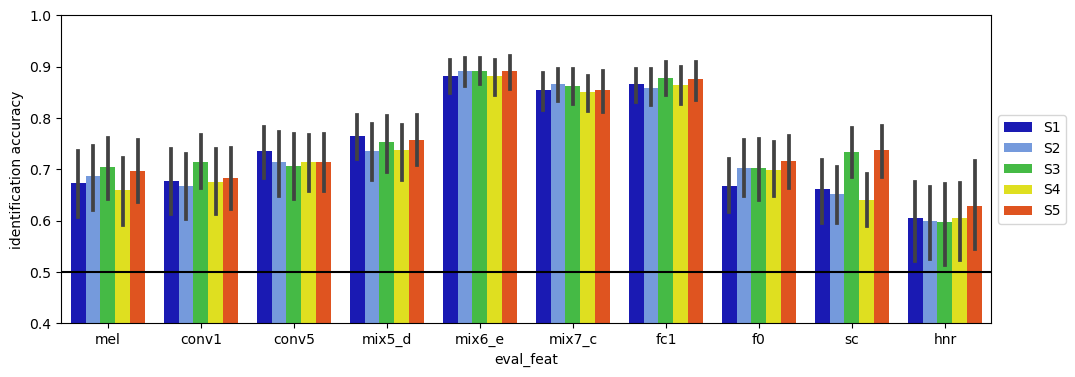

In [5]:
# Fig.3E Identification accuracy #################################
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
sns.barplot(ax=ax, 
            data=ident_df, 
            x="eval_feat", order=eval_feats,
            y="identification accuracy",  
            hue="subject", 
            palette=["mediumblue", "cornflowerblue", "limegreen", "yellow", "orangered"])
ax.set_ylim([0.4, 1.0])
ax.axhline(0.5, color='k', linestyle='-')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
save_filename = os.path.join(output_dir, 'Fig4C.png')
fig.savefig(save_filename, dpi=300, bbox_inches='tight', pad_inches=0.05)
print('Saved {}'.format(save_filename))

